In [134]:
# Goal 1: Describe your dataset

    # This data set consists of Video game sales from Vgcharts and corresponding ratings from Metacritic. VGCharts is a video
    # game sales tracking website that provides weekly sales figures of console software and hardware by region. Metacritic
    # is a website that aggregates reviews of media products. For each product, the scores from each review are averaged.

    # This dataset comes from kaggle.com, an online community of data scientists and machine learners that allow users to
    # upload data sets for public use.

    # This dataset is interesting in that it contains sales data for over 13,000 game titles, by region and globally, as well
    # as basic information such as year of release, platform, genre, developer and publisher. The set also 
    # contains review score data from metacritic staff professionals and metacritic users.
    
    # Note that the sales metrics indicate units sold in millions.

# Goal 2: Ask and answer analytic questions

    # (1) Which big publishers release the highest rated games on average?
    # We could analyze Critic_Score, User_Score and an aggregate of the two.
    # Problem: How do we define 'Big publisher' - list of publishers with the most games released?
    # 582 unique publishers. My definition: Big publisher = 50 or more published games.

    # (2) Which publishers have the most total global sales for all games released?
    # I will look at the total number of games sold over for each publisher and their combined Global_sales.

    # (3) Which indie developer has released the highest rated game?
    # Problem: How do we define 'Indie' developer? 
    # I will define 'Indie' as developers with less than 10 released and without external publishing.
    # We could extract the indie developers from the list and analyze Critic_score, User_score and an aggregate of the two. 

# Goal 3: Propose further research 

    # Some questions one might ask are:
    # Do any developers/publishers with multiple released games show better sales in any specific regions consistently?
    
    # I would look at each developer/publisher and compare each game they released and the trend of those sales for
    # each region. For each publisher/developer, a list could be compiled of their released games and
    # corresponding regional sales and you could plot those numbers to see which games did better in specific reasons.
    # Hypothetically, we would visually be able to tell what regions have the highest sales and if there is a trend,
    # it should easily be identifiable.
    
    # Could you predict the success rate (sales/review score) of a future game title by a specific developer/publisher? released
    # in a specific region? released on a specific platform?
    
    # This one might be a stretch and I'm not too sure of the actual possibility, but I hope to learn through this 
    # bootcamp if there is a way.

import statistics as stat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sales = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [2]:
# Goal 2 Questions:

# (1) Which big publishers release the highest rated games on average?

# Let's first find a way to define 'big' publisher.
# Let's gather a count for how many games each publisher released.
# We will limit the list to those publishers that released 50 or more games.
# This list will include the following publishers w/o PQube, ie., indexing [:46]

pubCounts = sales.Publisher.value_counts()[:47]
pubCounts

Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   706
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Eidos Interactive                          198
Midway Games                               198
505 Games                                  191
Microsoft Game Studios                     191
Acclaim Enter

In [3]:
# Now, let's extract the publisher names from this series

pubCounts._index

Index(['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft',
       'Konami Digital Entertainment', 'THQ', 'Nintendo',
       'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive', 'Capcom',
       'Atari', 'Tecmo Koei', 'Warner Bros. Interactive Entertainment',
       'Square Enix', 'Disney Interactive Studios', 'Unknown',
       'Eidos Interactive', 'Midway Games', '505 Games',
       'Microsoft Game Studios', 'Acclaim Entertainment', 'D3Publisher',
       'Vivendi Games', 'Codemasters', 'Idea Factory', 'Deep Silver',
       'Nippon Ichi Software', 'Zoo Digital Publishing',
       'Majesco Entertainment', 'LucasArts', 'Rising Star Games',
       'Hudson Soft', 'Bethesda Softworks', 'Banpresto', 'Crave Entertainment',
       'Atlus', 'Infogrames', 'Virgin Interactive', '5pb',
       'Focus Home Interactive', 'Ignition Entertainment',
       'Marvelous Interactive', 'Empire Interactive', 'SquareSoft',
       'Kadokawa Shoten', 'Destineer'],
      dtype='object')

In [4]:
# Here, we create a list, bigPubs, with the contents of pubCounts._index

# This is our list of Top Publishers

bigPubs = pubCounts._index.tolist()
bigPubs

['Electronic Arts',
 'Activision',
 'Namco Bandai Games',
 'Ubisoft',
 'Konami Digital Entertainment',
 'THQ',
 'Nintendo',
 'Sony Computer Entertainment',
 'Sega',
 'Take-Two Interactive',
 'Capcom',
 'Atari',
 'Tecmo Koei',
 'Warner Bros. Interactive Entertainment',
 'Square Enix',
 'Disney Interactive Studios',
 'Unknown',
 'Eidos Interactive',
 'Midway Games',
 '505 Games',
 'Microsoft Game Studios',
 'Acclaim Entertainment',
 'D3Publisher',
 'Vivendi Games',
 'Codemasters',
 'Idea Factory',
 'Deep Silver',
 'Nippon Ichi Software',
 'Zoo Digital Publishing',
 'Majesco Entertainment',
 'LucasArts',
 'Rising Star Games',
 'Hudson Soft',
 'Bethesda Softworks',
 'Banpresto',
 'Crave Entertainment',
 'Atlus',
 'Infogrames',
 'Virgin Interactive',
 '5pb',
 'Focus Home Interactive',
 'Ignition Entertainment',
 'Marvelous Interactive',
 'Empire Interactive',
 'SquareSoft',
 'Kadokawa Shoten',
 'Destineer']

In [5]:
# Since we will use the Critic_Score as a metric to answer our question, 
# we exclude any games that did not receive a MetaCritic score.
hasCritScore = sales[sales['Critic_Score'] >= 0.1]
hasCritScore

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


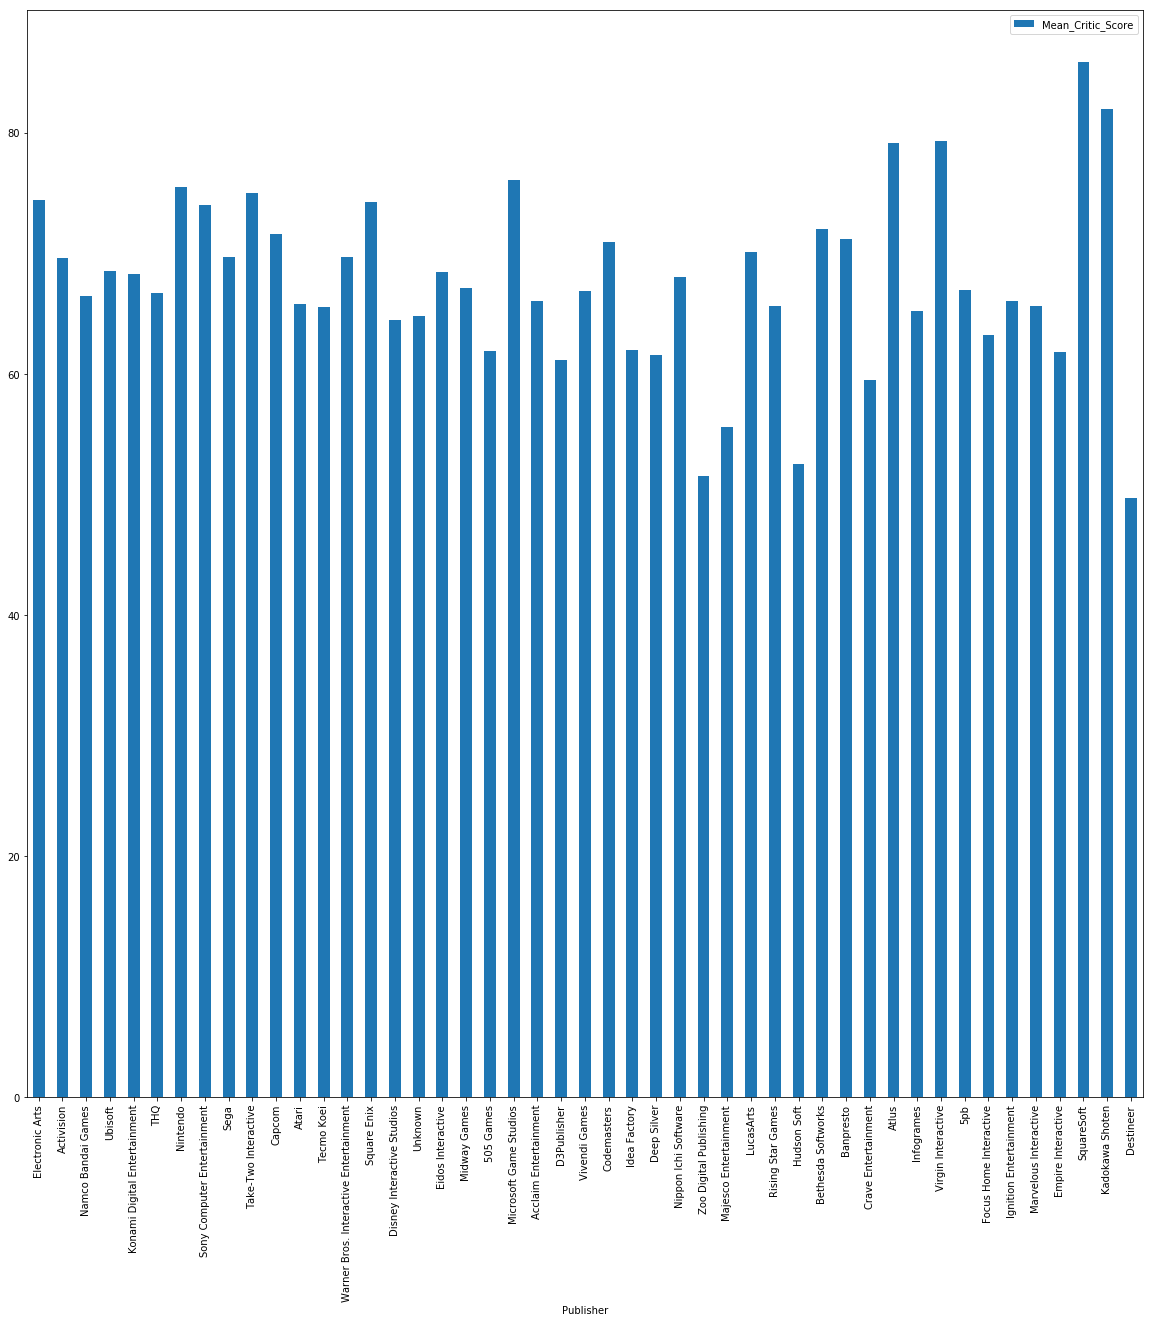

In [55]:
# Creating a data frame consisting of each top publisher and the mean MetaCritic score of all of their released games.

pubMeansList = []
def makePubMeansList(data):
    for x in data:
        list1 = [x,float(hasCritScore[hasCritScore['Publisher'] == x].Critic_Score.describe()[1:2])]
        list.append(pubMeansList, list1)

makePubMeansList(bigPubs)
pubMeanScores = pd.DataFrame(pubMeansList, columns=['Publisher', 'Mean_Critic_Score'])

# Now let's look at a graph of these mean scores

pubMeanScores.set_index('Publisher').plot(kind='bar', figsize=(20,20))
plt.show()

In [56]:
# By looking at the graph we can see that SquareSoft has the highest score followed by Kadokawa Shoten.

# Let's take a closer look and see the actual scores they received.

pubMeanScores.sort_values(by='Mean_Critic_Score', ascending=False).set_index('Publisher')

,Mean_Critic_Score
Publisher,
SquareSoft,85.888889
Kadokawa Shoten,82.000000
Virgin Interactive,79.368421
Atlus,79.192308
Microsoft Game Studios,76.108844
Nintendo,75.525806
Take-Two Interactive,75.013605
Electronic Arts,74.476190
Square Enix,74.304348


In [7]:
# As our bar graph suggested, we see that SquareSoft, responsible for the renowned Final Fantasy series, has the highest 
# average Metacritic staff score per released game of 85.89. The next highest mean scores are 
# Kadokawa Shoten with 82.00 and Virgin Interactive with 79.37.

# Now, lets compare the games' user scores of the same publishers.

# We exclude any games that did not receive a user score. We use User_Count to perform this since the User_Score
# contains both strings and floats and throws an error however, every game with a user_count 
# greater than 0, contains a User_Score.

hasUserScore = sales[sales['User_Count'] > 0]
hasUserScore

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


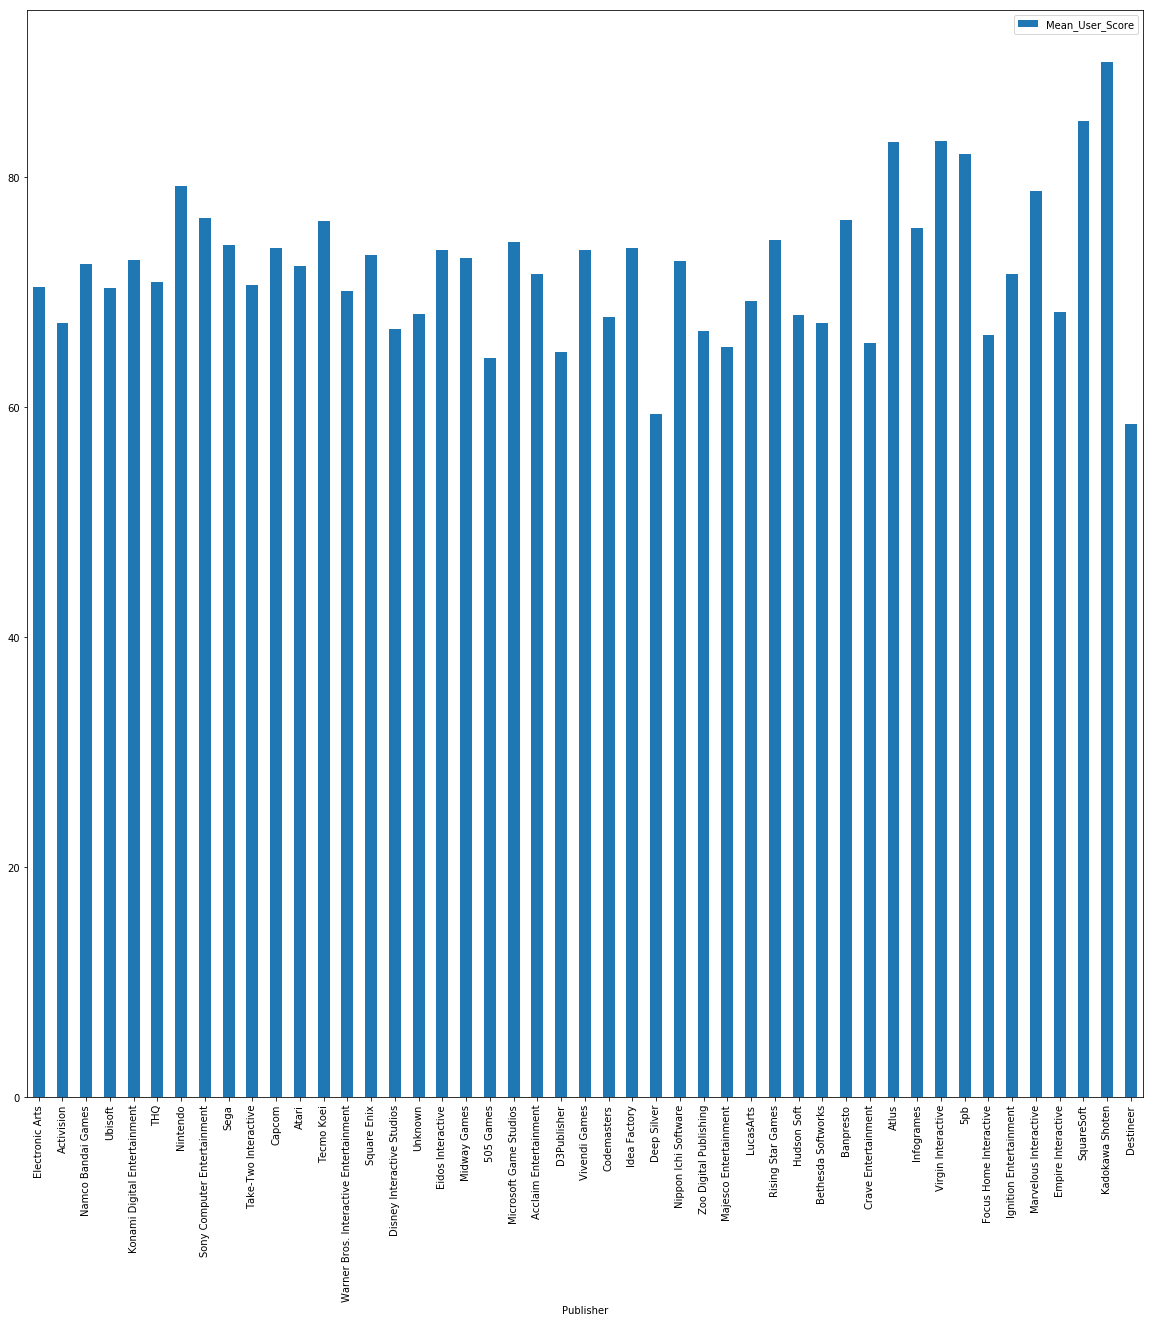

In [57]:
# let's look at the mean user scores for each publisher.

# We create a new data frame consisting of each big publisher and the mean user score of all of their released games.

# Since the range of scoring of the MetaCritic scores is 0-100 and the range of scoring of the user scores is 0-10,
# we will multiply the user score by 10 to compare to that of the MetaCritic scores

pubMeansList2 = []
def makePubMeansList2(data):
    for x in data:
        list1 = [x,float(hasUserScore[hasUserScore['Publisher'] == x].User_Score.astype('float64').describe()[1:2])*10]
        list.append(pubMeansList2, list1)

makePubMeansList2(bigPubs)
pubMeanScores2 = pd.DataFrame(pubMeansList2, columns=['Publisher', 'Mean_User_Score'])

pubMeanScores2.set_index('Publisher').plot(kind='bar', figsize=(20,20))
plt.show()



In [58]:
# This time we see Kadokawa Shoten having the highest MetaCritic user score, followed by SquareSoft in 2nd.

# let's see the actual scores

pubMeanScores2.sort_values(by='Mean_User_Score', ascending=False).set_index('Publisher')

,Mean_User_Score
Publisher,
Kadokawa Shoten,90.000000
SquareSoft,84.888889
Virgin Interactive,83.157895
Atlus,83.080000
5pb,82.000000
Nintendo,79.187075
Marvelous Interactive,78.800000
Sony Computer Entertainment,76.415902
Banpresto,76.250000


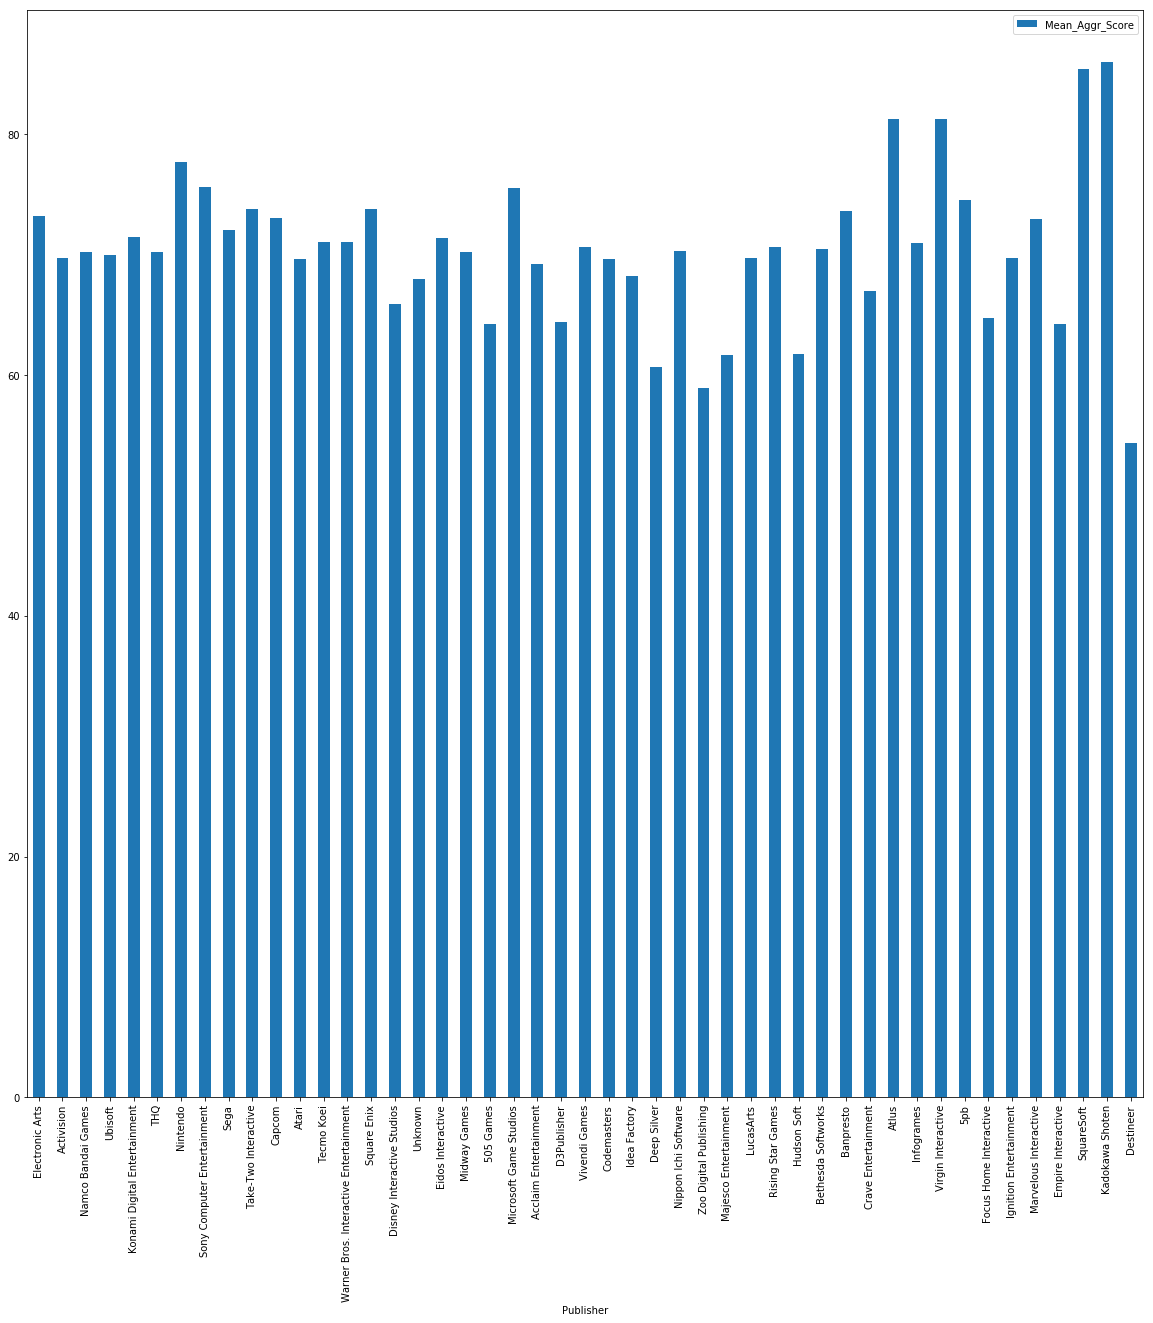

In [60]:
# Again, as the graph suggested, we see the Kadokawa Shoten with the highest score of 90, 
# followed by SquareSoft with 84.89, Virgin Interactive with 83.16, and Atlus with 83.08. 

# Let's combine the scores and take the average of both for an aggregate mean.

# Since the Mean_User_Scores and Mean_Critic_Scores are determined from two different subsets of sales, we
# will take hasCritScore and create a subset including only those games with user_scores to take the average

hasBothScores = hasCritScore[hasCritScore['User_Count'] > 0]

pubMeansList3 = []
def makePubMeansList3(data):
    for x in data:
        list1 = [x,(float(hasBothScores[hasBothScores['Publisher'] == x].User_Score.astype('float64').describe()[1:2])*10 + 
                float(hasBothScores[hasBothScores['Publisher'] == x].Critic_Score.describe()[1:2]))/2]
        list.append(pubMeansList3, list1)
    
makePubMeansList3(bigPubs)
pubMeanScores3 = pd.DataFrame(pubMeansList3, columns=['Publisher', 'Mean_Aggr_Score'])

pubMeanScores3.set_index('Publisher').plot(kind='bar', figsize=(20,20))
plt.show()



In [61]:
# With both scores combined, it seem as though Kadokawa Shoten is slightly ahead of SquareSoft 
# for highest combined average score.

# Let's see the actual scores.

pubMeanScores3.sort_values(by='Mean_Aggr_Score', ascending=False).set_index('Publisher')

,Mean_Aggr_Score
Publisher,
Kadokawa Shoten,86.000000
SquareSoft,85.388889
Atlus,81.300000
Virgin Interactive,81.263158
Nintendo,77.688776
Sony Computer Entertainment,75.636076
Microsoft Game Studios,75.535461
5pb,74.500000
Take-Two Interactive,73.819343


In [10]:
# We see Kadokawa Shoten still holds the top position with a aggregate mean score of 86 per title,
# SquareSoft in close 2nd place with 85.39, and Virgin Interactive & Atlus close behind in the low 80s.

# It's important to note that although Kadokawa Shoten did release enough games to be considered a 'Big Publisher',
# when excluding games that were not rated by both MetaCritic and users, only 2 games by Kadokawa Shoten remained, 
# skewing their score greatly.

# Therefore, we have a limitation to our analysis: 
# A number of publishers did not have all of their released games included in the mean 
# scores and could also only have scores for their most popular games. 

# Let's see what happens when we analyze our abbreviated sales list, including only games with MetaCritic AND user scores,
# and take those publishers that have over 50 games released. 



In [11]:
# We use the same process as before.
# This list will include the following publishers w/o D3Publisher, ie., indexing [:29]

pubCounts2 = hasBothScores.Publisher.value_counts()[:30]
pubCounts2

Electronic Arts                           957
Ubisoft                                   500
Activision                                498
Sony Computer Entertainment               316
THQ                                       309
Nintendo                                  294
Sega                                      291
Take-Two Interactive                      274
Konami Digital Entertainment              250
Namco Bandai Games                        246
Capcom                                    200
Atari                                     179
Microsoft Game Studios                    141
Tecmo Koei                                140
Warner Bros. Interactive Entertainment    139
Square Enix                               135
Eidos Interactive                         125
Vivendi Games                             116
Codemasters                               114
Midway Games                              106
505 Games                                  80
Deep Silver                       

In [12]:
# Now, let's extract the publisher names from this series

pubCounts2._index

Index(['Electronic Arts', 'Ubisoft', 'Activision',
       'Sony Computer Entertainment', 'THQ', 'Nintendo', 'Sega',
       'Take-Two Interactive', 'Konami Digital Entertainment',
       'Namco Bandai Games', 'Capcom', 'Atari', 'Microsoft Game Studios',
       'Tecmo Koei', 'Warner Bros. Interactive Entertainment', 'Square Enix',
       'Eidos Interactive', 'Vivendi Games', 'Codemasters', 'Midway Games',
       '505 Games', 'Deep Silver', 'Disney Interactive Studios', 'LucasArts',
       'Unknown', 'Acclaim Entertainment', 'Nippon Ichi Software',
       'Rising Star Games', 'Bethesda Softworks', 'D3Publisher'],
      dtype='object')

In [13]:
# Here, we create a list, bigPubs2, with the contents of pubCounts._index

bigPubs2 = pubCounts2._index.tolist()
bigPubs2

['Electronic Arts',
 'Ubisoft',
 'Activision',
 'Sony Computer Entertainment',
 'THQ',
 'Nintendo',
 'Sega',
 'Take-Two Interactive',
 'Konami Digital Entertainment',
 'Namco Bandai Games',
 'Capcom',
 'Atari',
 'Microsoft Game Studios',
 'Tecmo Koei',
 'Warner Bros. Interactive Entertainment',
 'Square Enix',
 'Eidos Interactive',
 'Vivendi Games',
 'Codemasters',
 'Midway Games',
 '505 Games',
 'Deep Silver',
 'Disney Interactive Studios',
 'LucasArts',
 'Unknown',
 'Acclaim Entertainment',
 'Nippon Ichi Software',
 'Rising Star Games',
 'Bethesda Softworks',
 'D3Publisher']

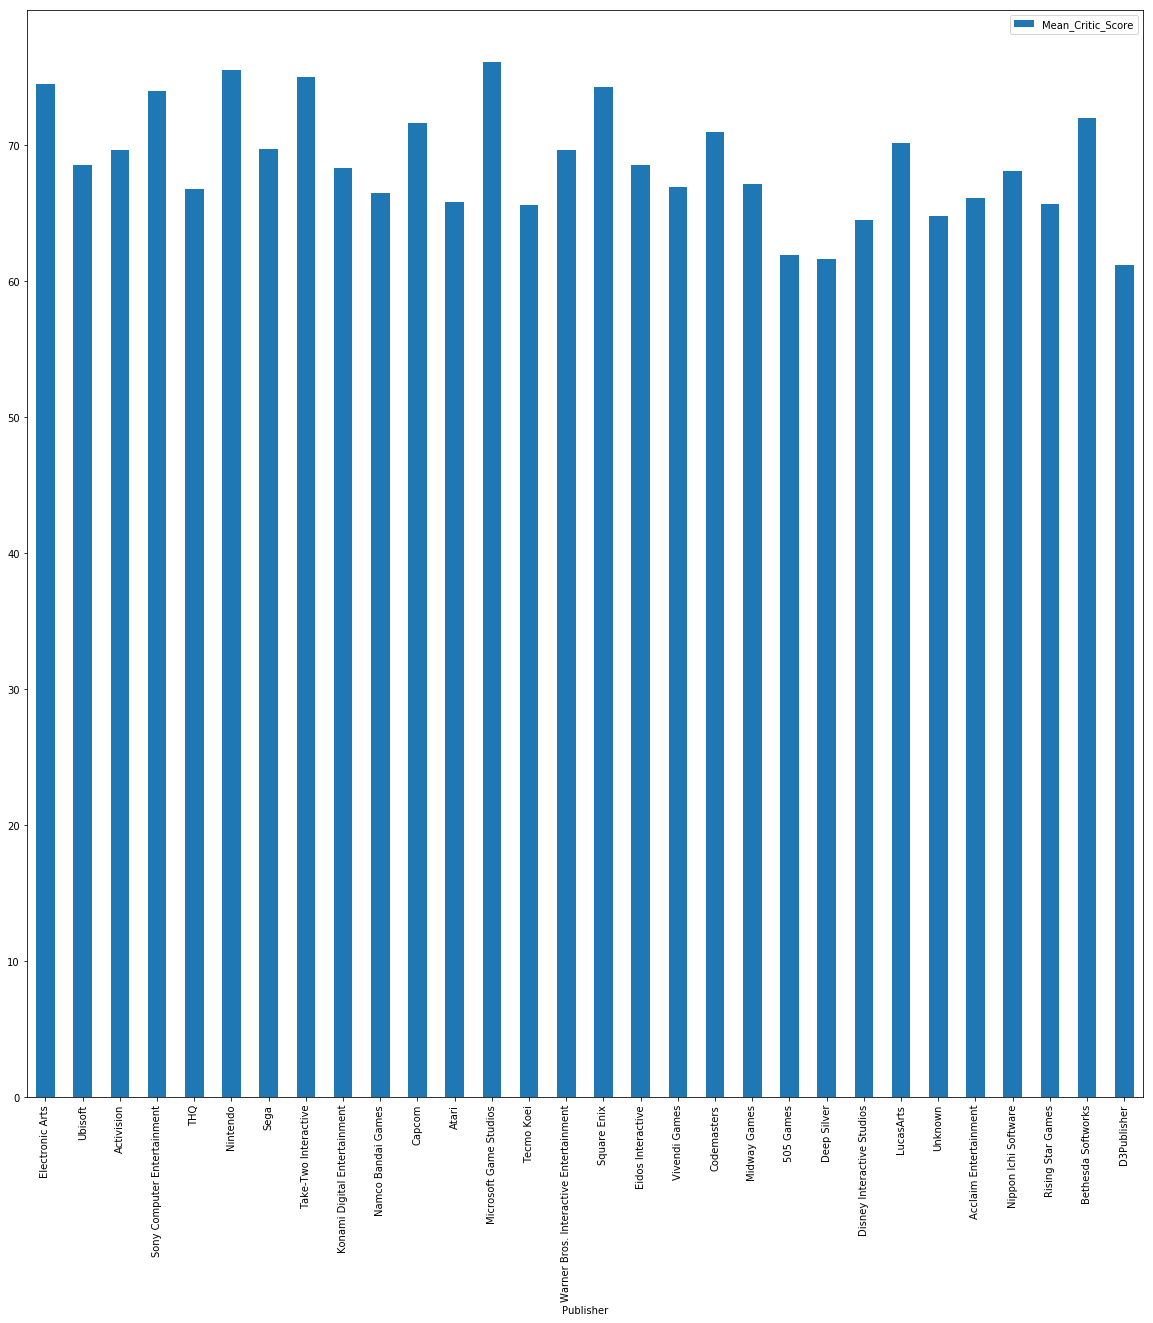

In [62]:
# Creating a data frame consisting of each top publisher and the mean MetaCritic score of all of their released games.

pubMeansList4 = []
def makePubMeansList4(data):
    for x in data:
        list1 = [x,float(hasCritScore[hasCritScore['Publisher'] == x].Critic_Score.describe()[1:2])]
        list.append(pubMeansList4, list1)

makePubMeansList4(bigPubs2)
pubMeanScores4 = pd.DataFrame(pubMeansList4, columns=['Publisher', 'Mean_Critic_Score'])

pubMeanScores4.set_index('Publisher').plot(kind='bar', figsize=(20,20))
plt.show()

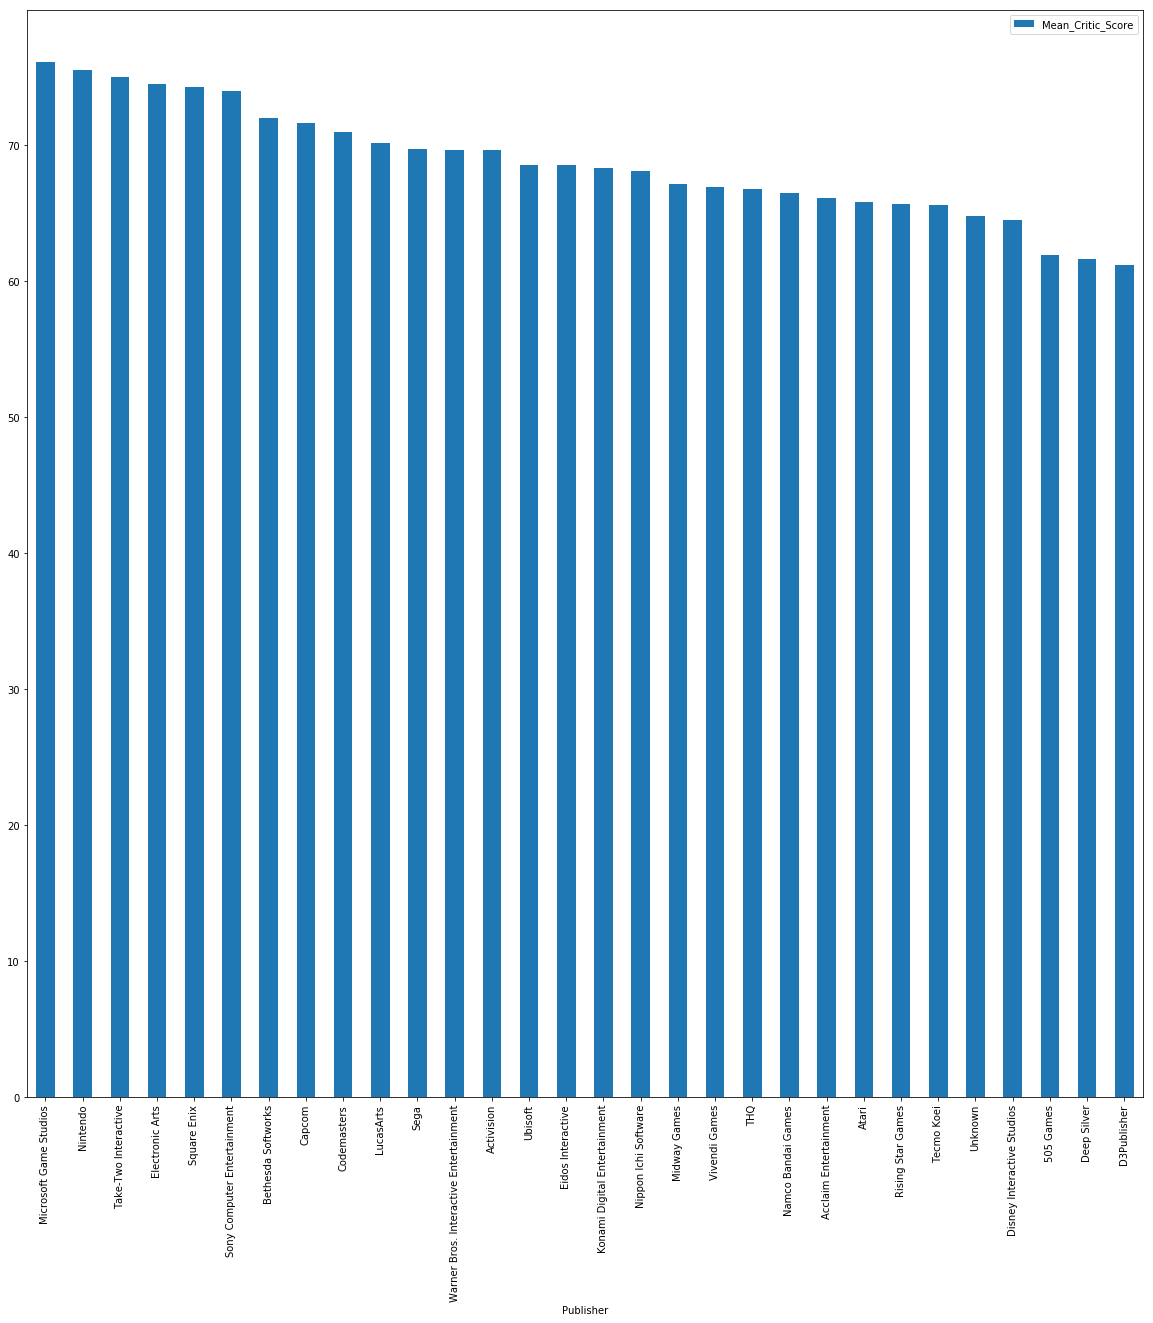

In [66]:
# Here we see very different results than our previous analysi, and it has become much more difficult to distinguish
# who has the highest scores so let's sort the list by highest score and plot it.

pubMeanScores4.sort_values('Mean_Critic_Score', ascending=False).set_index('Publisher').plot(kind='bar', figsize=(20,20))
plt.show()

In [64]:
# We see the top publishers are Microsoft Game Studio, Nintendo and Take-Two Interactive. We have received a much
# different result than our previous analysis when we did not account for some publishers having very little 
# game scores available in the dataset.

# Let's see what each publisher scored.

pubMeanScores4.sort_values(by='Mean_Critic_Score', ascending=False).set_index('Publisher')

,Mean_Critic_Score
Publisher,
Microsoft Game Studios,76.108844
Nintendo,75.525806
Take-Two Interactive,75.013605
Electronic Arts,74.476190
Square Enix,74.304348
Sony Computer Entertainment,74.002865
Bethesda Softworks,72.019231
Capcom,71.655814
Codemasters,70.942149


In [ ]:
# We see Microsoft Game Studios receiving the highest average MetaCritic staff score for 
# each game they release. Close contenders were Nintendo with 75.53, 
# Take-Two Intertactive with 75.01 and Electronic Arts with 74.48.

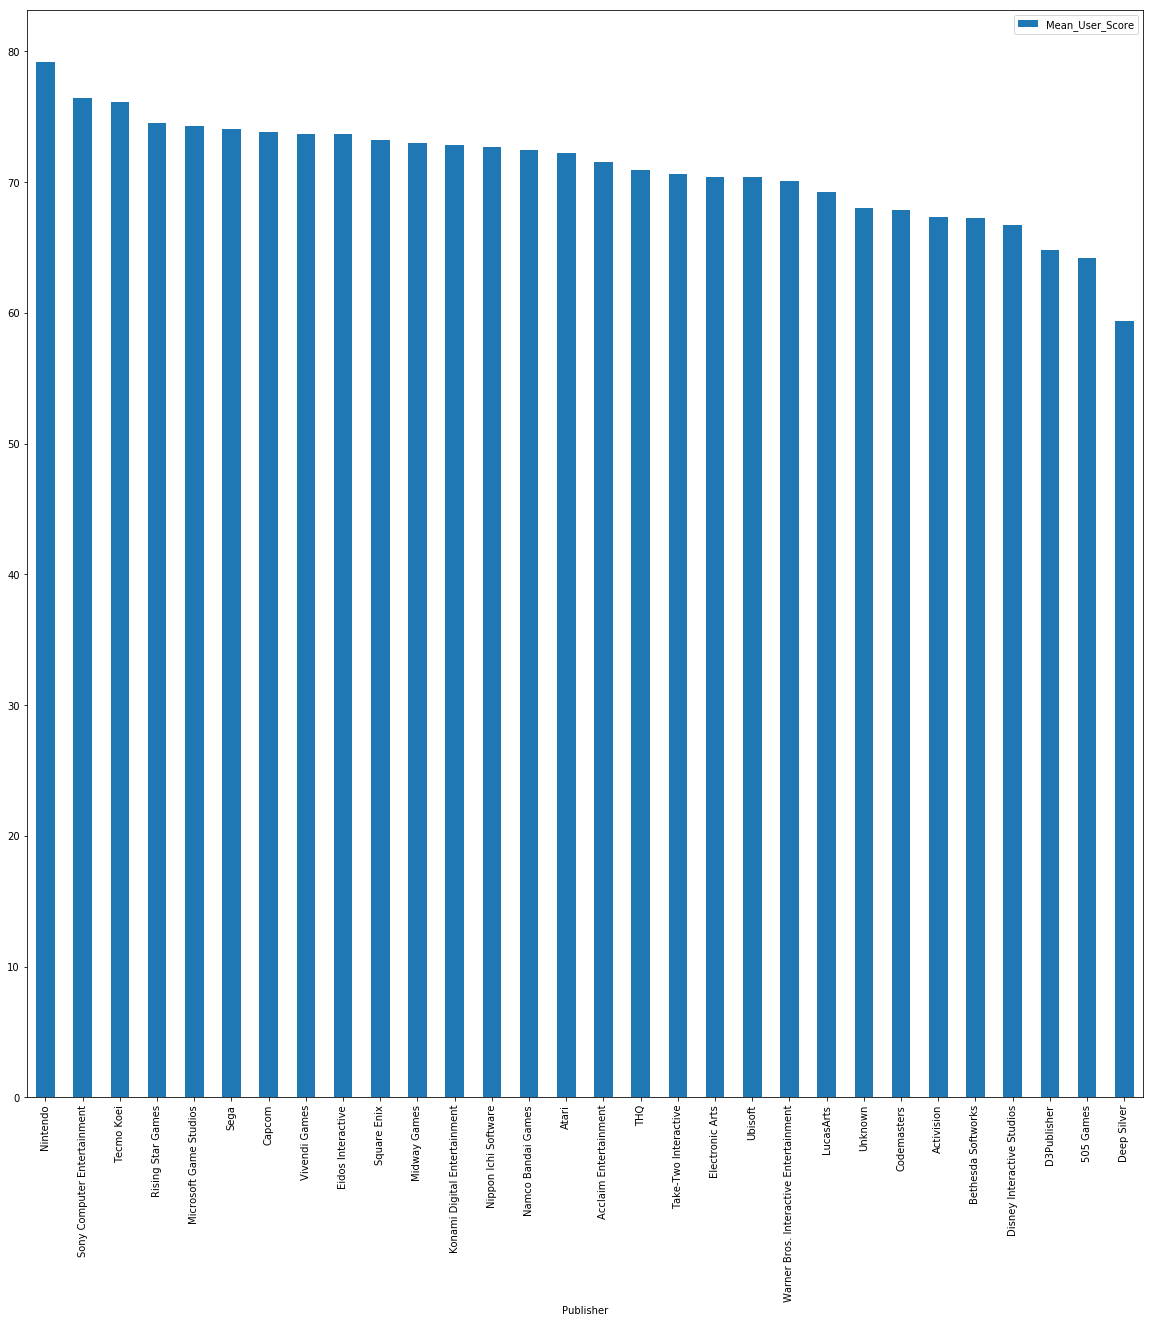

In [68]:
# We create a new data frame consisting of each top publisher and the mean user score of all of their released games.

# Since the range of scoring of the MetaCritic scores is 0-100 and the range of scoring of the user scores is 0-10,
# we will multiply the user score by 10 to compare to that of the MetaCritic scores

pubMeansList5 = []
def makePubMeansList5(data):
    for x in data:
        list1 = [x,float(hasUserScore[hasUserScore['Publisher'] == x].User_Score.astype('float64').describe()[1:2])*10]
        list.append(pubMeansList5, list1)

makePubMeansList5(bigPubs2)
pubMeanScores5 = pd.DataFrame(pubMeansList5, columns=['Publisher', 'Mean_User_Score'])

# When we plot this graph, we will skip straight to sorting the values to see more clearly who has the highest score.

pubMeanScores5.sort_values('Mean_User_Score', ascending=False).set_index('Publisher').plot(kind='bar', figsize=(20,20))
plt.show()

In [69]:
# This graph shows Nintendo having the highest average score for each of their games, followed 
# by Sony Computer Entertainment and Tecmo Koei. Notice Microsoft Game Studio has fallen to the 5th position.

# Let's get the scores.

pubMeanScores5.sort_values(by='Mean_User_Score', ascending=False).set_index('Publisher')

,Mean_User_Score
Publisher,
Nintendo,79.187075
Sony Computer Entertainment,76.415902
Tecmo Koei,76.138889
Rising Star Games,74.547170
Microsoft Game Studios,74.321918
Sega,74.053872
Capcom,73.799020
Vivendi Games,73.699187
Eidos Interactive,73.694656


In [ ]:
# According to the users ratings, Nintendo has the highest average score for each of their games with a 79.19,
# followed by Sony Computer Entertainment with 76.33 and Tecmo Koei with 76.23.

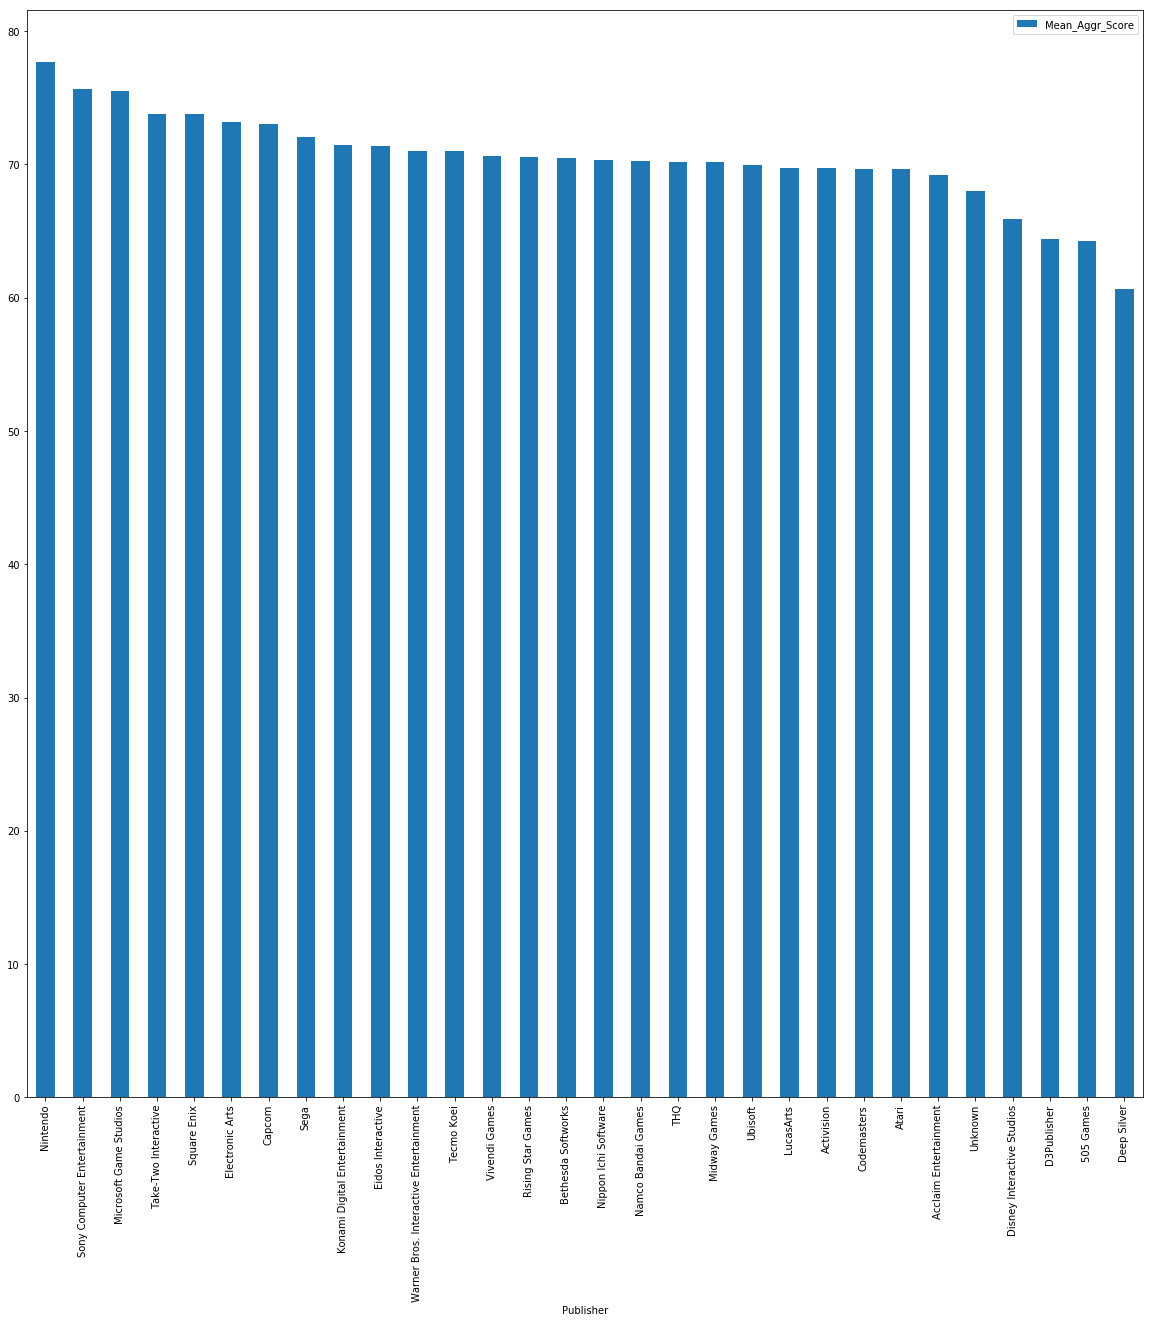

In [72]:
# Let's combine the scores and take the average of both for an aggregate mean.

pubMeansList6 = []
def makePubMeansList6(data):
    for x in data:
        list1 = [x,(float(hasBothScores[hasBothScores['Publisher'] == x].User_Score.astype('float64').describe()[1:2])*10 + 
                float(hasBothScores[hasBothScores['Publisher'] == x].Critic_Score.describe()[1:2]))/2]
        list.append(pubMeansList6, list1)

makePubMeansList6(bigPubs2)
pubMeanScores6 = pd.DataFrame(pubMeansList6, columns=['Publisher', 'Mean_Aggr_Score'])
pubMeanScores6.sort_values(by='Mean_Aggr_Score')

pubMeanScores6.sort_values('Mean_Aggr_Score', ascending=False).set_index('Publisher').plot(kind='bar', figsize=(20,20))
plt.show()

In [73]:
# Nintendo and Sony Computer Entertainment still hold the top two positions however, we do see Microsoft
# Game Studios sneak back up into the 3rd highest average combined score.

# What are these average combined scores?

pubMeanScores6.sort_values(by='Mean_Aggr_Score', ascending=False).set_index('Publisher')

,Mean_Aggr_Score
Publisher,
Nintendo,77.688776
Sony Computer Entertainment,75.636076
Microsoft Game Studios,75.535461
Take-Two Interactive,73.819343
Square Enix,73.788889
Electronic Arts,73.212121
Capcom,73.007500
Sega,72.072165
Konami Digital Entertainment,71.460000


In [19]:
# Considering the average of both scores, Nintendo is in first with an average score of 77.69, followed by Sony Computer
# Entertainment(SCE) with 75.64 and Microsoft Game Studios(M$G) with 75.54. 

# Something interesting to note is that Square Enix was formerly SquareSoft, who we determined
# did very well on our previous analysis. 

# One could make the argument that considering both analysis approaches and because Square Enix is very close
# behind Nintendo, SCE and M$G, Square Enix releases games that receive the best overall rating.

In [20]:
# (2) Which publishers have the most total global sales for all games released?

# First, let's create a list of unique publishers

unique_list = []  
 
def unique(list1):  
    for x in list1:  
        if x not in unique_list:
            unique_list.append(x)
    print(unique_list)

unique(sales['Publisher'])

['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive', 'Sony Computer Entertainment', 'Activision', 'Ubisoft', 'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft', 'Atari', '505 Games', 'Capcom', 'GT Interactive', 'Konami Digital Entertainment', 'Square Enix', 'Sony Computer Entertainment Europe', 'Virgin Interactive', 'LucasArts', 'Warner Bros. Interactive Entertainment', 'Universal Interactive', 'Eidos Interactive', 'RedOctane', 'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games', 'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive', 'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios', nan, 'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5', 'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver', 'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis', 'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software', 'Mindscape', 'Infogrames', 'Unknown', 'Square', 'Valve', 'Banpresto', 'Hello Games', 'D3Publisher', 'Act

In [21]:
# I do notice a NaN entry in the unique publishers list so we will amend it do create our final
# unique publishers list

uniquePubList = ['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive', 'Sony Computer Entertainment', 'Activision', 'Ubisoft', 'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft', 'Atari', '505 Games', 'Capcom', 'GT Interactive', 'Konami Digital Entertainment', 'Square Enix', 'Sony Computer Entertainment Europe', 'Virgin Interactive', 'LucasArts', 'Warner Bros. Interactive Entertainment', 'Universal Interactive', 'Eidos Interactive', 'RedOctane', 'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games', 'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive', 'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios', 'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5', 'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver', 'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis', 'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software', 'Mindscape', 'Infogrames', 'Unknown', 'Square', 'Valve', 'Banpresto', 'Hello Games', 'D3Publisher', 'Activision Value', 'Oxygen Interactive', 'Red Storm Entertainment', 'Video System', 'Global Star', 'Gotham Games', 'Westwood Studios', 'GungHo', 'Crave Entertainment', 'Hudson Soft', 'Coleco', 'Rising Star Games', 'TDK Mediactive', 'ASC Games', 'Accolade', 'Zoo Games', 'Sony Online Entertainment', '3DO', 'Natsume', 'RTL', 'Alchemist', 'Black Label Games', 'SouthPeak Games', 'Focus Home Interactive', 'Ocean', 'Zoo Digital Publishing', 'Psygnosis', 'City Interactive', 'Empire Interactive', 'Success', 'Compile', 'Russel', 'Atlus', 'Mastertronic', 'Slightly Mad Studios', 'Taito', 'Agetec', 'Microprose', 'Play It', 'GSP', 'Tomy Corporation', 'Sammy Corporation', 'Koch Media', 'Game Factory', 'Titus', 'Marvelous Entertainment', 'Genki', 'Mojang', 'CTO SpA', 'TalonSoft', 'Crystal Dynamics', 'Square Enix ', 'mixi, Inc', 'Pinnacle', 'SCi', 'Quelle', 'Rage Software', 'Ubisoft Annecy', 'Interplay', 'Scholastic Inc.', 'Mystique', 'ChunSoft', 'Square EA', '20th Century Fox Video Games', 'Hudson Entertainment', 'Men-A-Vision', 'Nobilis', 'Avanquest Software', 'Big Ben Interactive', 'Nordic Games', 'Touchstone', 'Spike', 'Nippon Ichi Software', 'Sony Computer Entertainment America', 'Jester Interactive', 'LEGO Media', 'Quest', 'Illusion Softworks', 'Tigervision', 'Rocket Company', 'Metro 3D', 'Mattel Interactive', 'IE Institute', 'Funbox Media', 'Rondomedia', 'Universal Gamex', 'Ghostlight', 'Wizard Video Games', 'BMG Interactive Entertainment', 'PQube', 'Trion Worlds', 'Xseed Games', 'Laguna', 'Takara', 'Ignition Entertainment', 'Kadokawa Shoten', 'Enterbrain', 'Imagineer', 'CPG Products', 'System 3 Arcade Software', 'Aruze Corp', 'Destineer', 'Gamebridge', 'Midas Interactive Entertainment', 'Jaleco', 'Answer Software', 'Pack In Soft', 'XS Games', 'Rebellion', 'Ultravision', 'Harmonix Music Systems', 'Activision Blizzard', 'Xplosiv', 'Wanadoo', 'Telltale Games', 'NovaLogic', 'Epoch', 'BAM! Entertainment', 'GameMill Entertainment', 'Knowledge Adventure', 'Tetris Online', 'Mastiff', 'ESP', 'TYO', 'Telegames', 'Mud Duck Productions', 'Screenlife', 'Pioneer LDC', 'Magical Company', 'Kemco', 'Mentor Interactive', 'Human Entertainment', 'Data Age', 'Electronic Arts Victor', 'Jack of All Games', 'Avanquest', 'Black Bean Games', '989 Sports', 'Takara Tomy', 'Media Rings', 'Elf', 'Starfish', 'Zushi Games', 'Jorudan', 'Destination Software, Inc', 'New', 'Brash Entertainment', 'Kalypso Media', 'ITT Family Games', 'Ackkstudios', 'PopCap Games', 'Starpath Corp.', 'BPS', 'Gathering of Developers', 'NewKidCo', 'Marvelous Interactive', 'Storm City Games', 'CokeM Interactive', 'P2 Games', 'CBS Electronics', 'Home Entertainment Suppliers', 'Magix', 'Arc System Works', 'Angel Studios', 'Wargaming.net', 'Playmates', 'SNK Playmore', 'Hamster Corporation', 'From Software', 'Nippon Columbia', 'Nichibutsu', 'Conspiracy Entertainment', 'Hect', 'Mumbo Jumbo', 'DTP Entertainment', 'Pacific Century Cyber Works', 'Indie Games', 'Liquid Games', 'NEC', 'Axela', 'ArtDink', 'Sunsoft', 'Little Orbit', 'FuRyu', 'Gust', 'SNK', 'NEC Interchannel', 'Nihon Falcom Corporation', 'Xing Entertainment', 'ValuSoft', 'Victor Interactive', 'American Softworks', 'Falcom Corporation', 'Detn8 Games', 'Bomb', 'Nordcurrent', 'Milestone S.r.l.', 'AQ Interactive', 'Sears', 'Seta Corporation', 'On Demand', 'CCP', 'NCS', 'Rebellion Developments', 'Agatsuma Entertainment', 'Gremlin Interactive Ltd', 'Aspyr', 'Compile Heart', 'Culture Brain', 'Mad Catz', 'Shogakukan', 'Merscom LLC', 'JoWood Productions', 'Nippon Telenet', 'TDK Core', 'Kadokawa Games', 'SSI', 'Foreign Media Games', 'Core Design Ltd.', 'bitComposer Games', 'Astragon', 'Asylum Entertainment', 'Performance Designed Products', 'UFO Interactive', 'Essential Games', 'Adeline Software', 'Funcom', 'PlayV', 'Panther Software', 'Blast! Entertainment Ltd', 'Playlogic Game Factory', 'DSI Games', 'Avalon Interactive', 'Game Life', 'Popcorn Arcade', 'Aques', 'System 3', 'Syscom', 'Vir2L Studios', 'Vatical Entertainment', 'Neko Entertainment', 'White Park Bay Software', 'Vic Tokai', 'Media Factory', 'Daedalic', 'Game Arts', 'The Adventure Company', 'EA Games', 'Acquire', 'Broccoli', 'General Entertainment', 'Paradox Interactive', 'Yacht Club Games', 'Imadio', 'Swing! Entertainment', 'Sony Music Entertainment', 'Aqua Plus', 'Excalibur Publishing', 'Hip Interactive', 'Tripwire Interactive', 'DreamCatcher Interactive', 'SCS Software', 'Havas Interactive', 'Sting', 'Idea Factory', 'Telstar', 'U.S. Gold', 'Funsta', 'DreamWorks Interactive', 'Slitherine Software', 'MTO', 'Graffiti', 'Tru Blu Entertainment', 'DHM Interactive', 'Crytek', 'FunSoft', 'Data Design Interactive', 'SPS', 'Moss', 'T&E Soft', 'NDA Productions', 'Bigben Interactive', 'Data East', 'Idea Factory International', 'Time Warner Interactive', 'Gainax Network Systems', 'Daito', 'O3 Entertainment', 'O-Games', 'Gameloft', 'Xicat Interactive', 'Simon & Schuster Interactive', 'Valcon Games', 'PopTop Software', 'TOHO', 'PM Studios', 'Bohemia Interactive', 'Reef Entertainment', '5pb', 'HMH Interactive', 'inXile Entertainment', 'Cave', 'Microids', 'Paon', 'CDV Software Entertainment', 'Micro Cabin', 'GameTek', 'Benesse', 'Type-Moon', 'Enjoy Gaming ltd.', 'Asmik Corp', 'Interplay Productions', 'Asmik Ace Entertainment', 'Image Epoch', 'Phantom EFX', 'Evolved Games', 'responDESIGN', 'Griffin International', 'Culture Publishers', 'Hackberry', 'Hearty Robin', 'Nippon Amuse', 'Origin Systems', 'Seventh Chord', 'Abylight', 'Mitsui', 'Insomniac Games', 'Flight-Plan', 'Milestone', 'Glams', 'Aksys Games', 'Locus', 'Warp', 'Irem Software Engineering', 'Myelin Media', 'Global A Entertainment', 'Alternative Software', 'Mercury Games', 'Sunrise Interactive', 'Elite', 'Evolution Games', 'Daedalic Entertainment', 'Edia', 'Athena', 'Aria', 'Tivola', 'Happinet', 'Tommo', 'Altron', 'Revolution Software', 'Media Works', 'Fortyfive', 'Gamecock', 'Imax', '10TACLE Studios', 'Groove Games', 'Pack-In-Video', 'Crimson Cow', 'iWin', 'Asgard', 'Ecole', 'Yumedia', 'Ascaron Entertainment GmbH', 'HAL Laboratory', 'Phenomedia', 'Grand Prix Games', 'DigiCube', 'Creative Core', 'Kaga Create', 'WayForward Technologies', 'LSP Games', 'ASCII Media Works', '1C Company', 'Coconuts Japan', 'Arika', 'Marvel Entertainment', 'Ertain', 'Prototype', 'Phantagram', 'The Learning Company', 'TechnoSoft', 'MLB.com', 'Vap', 'Misawa', 'Yeti', 'Dusenberry Martin Racing', 'Navarre Corp', 'Pow', 'MediaQuest', 'Team17 Software', 'Max Five', 'Tradewest', 'Comfort', 'Milestone S.r.l', 'Pony Canyon', 'Riverhillsoft', 'Summitsoft', 'Playmore', 'Kool Kizz', 'Monte Christo Multimedia', 'TopWare Interactive', 'Legacy Interactive', 'Cloud Imperium Games Corporation', 'Flashpoint Games', 'CyberFront', 'Alawar Entertainment', 'Societa', 'Interchannel', 'Experience Inc.', 'Sonnet', 'Virtual Play Games', 'Zenrin', 'Iceberg Interactive', 'Ivolgamus', 'MC2 Entertainment', '2D Boy', 'Games Workshop', 'Kando Games', 'Office Create', 'Maximum Family Games', 'Fields', 'Gearbox Software', 'Princess Soft', 'Extreme Entertainment Group', 'Big Fish Games', 'Berkeley', 'Mamba Games', 'Fuji', 'FuRyu Corporation', 'Her Interactive', 'imageepoch Inc.', 'Just Flight', 'Kamui', 'ASK', 'Cygames', 'Introversion Software', '49Games', 'KSS', 'dramatic create', 'TGL', 'KID', 'Quinrose', 'Sold Out', 'Encore', 'G.Rev', 'Sunflowers', 'Headup Games', 'Sweets', 'Kokopeli Digital Studios', 'id Software', 'Nexon', 'BushiRoad', 'Devolver Digital', 'Number None', 'Tryfirst', 'GN Software', "Yuke's", 'Strategy First', 'Lexicon Entertainment', 'Paon Corporation', 'Kids Station', 'Licensed 4U', 'GOA', '7G//AMES', 'King Records', 'Minato Station', 'Graphsim Entertainment', 'Easy Interactive', 'Gaga', 'Yamasa Entertainment', 'Plenty', 'Views', 'Blue Byte', 'fonfun', 'NetRevo', 'Epic Games', 'Quintet', 'Focus Multimedia', 'Phoenix Games', 'Marvelous Games', 'Dorart', 'Codemasters Online', 'Stainless Games', 'Aerosoft', 'Imageworks', 'Karin Entertainment', 'Technos Japan Corporation', 'Masque Publishing', 'Gakken', 'New World Computing', 'Mirai Shounen', 'Datam Polystar', 'HuneX', 'Visco', 'Saurus', 'Revolution (Japan)', 'Giza10', 'Alvion', 'Giga', 'Mycom', 'Warashi', 'System Soft', 'RED Entertainment', 'Lighthouse Interactive', 'Michaelsoft', 'Media Entertainment', 'Genterprise', 'Interworks Unlimited, Inc.', 'Inti Creates', 'Boost On', 'EON Digital Entertainment', 'Nitroplus', 'Naxat Soft', 'Piacci', 'Paradox Development', 'Otomate', 'Ascaron Entertainment', 'Ongakukan', 'Commseed', 'UIG Entertainment', 'Takuyo', 'Interchannel-Holon', 'Red Flagship']

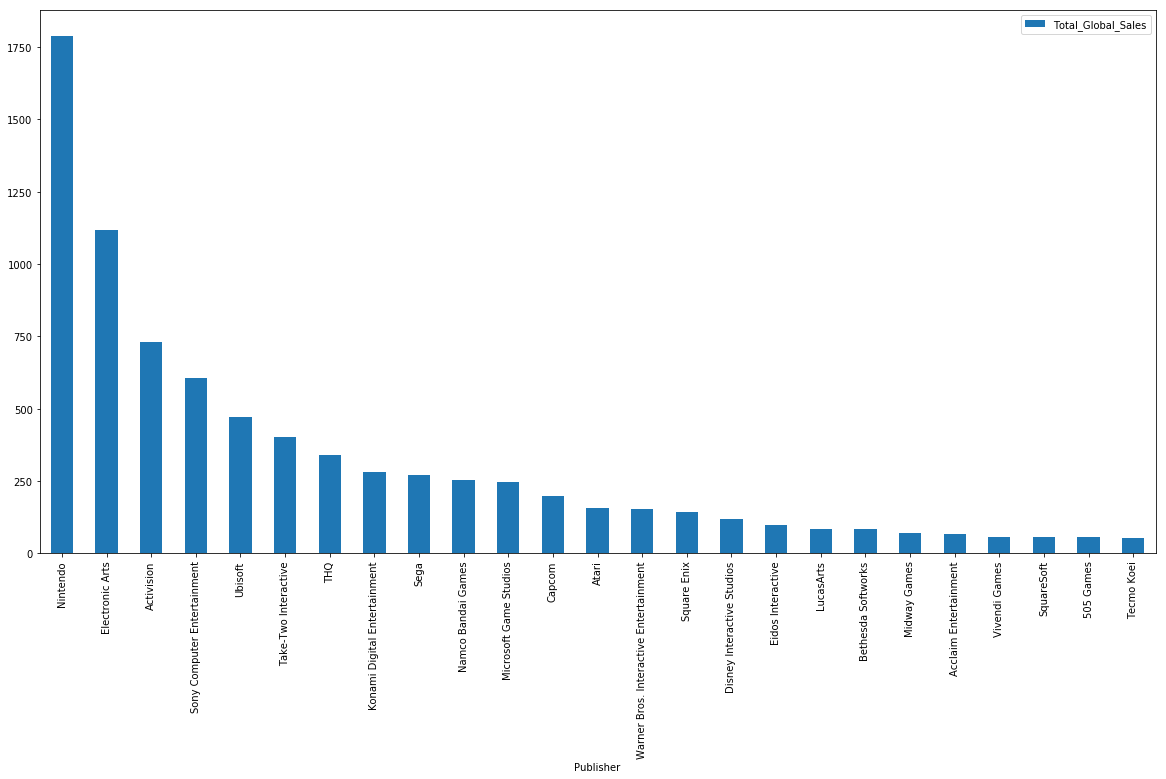

In [78]:
# Now lets compile a table of each publisher and their corresponding total global sales for all games released.

pubGlobalSalesList = []
def makePubGlobalSalesList(data):
    for x in data:
        list1 = [x,sum(sales[sales['Publisher'] == x].Global_Sales)]
        list.append(pubGlobalSalesList, list1)

makePubGlobalSalesList(uniquePubList)
pubGlobalSales = pd.DataFrame(pubGlobalSalesList, columns=['Publisher', 'Total_Global_Sales'])
pubGlobalSales.sort_values(by='Total_Global_Sales')

# Let's sort the values and plot a graph to see where the publishers stand. The full list of publishers
# is extensive so we will only include the top 25 publishers on the list.

pubGlobalSales.sort_values('Total_Global_Sales', ascending=False)[:25].set_index('Publisher').plot(kind='bar', figsize=(20,10))
plt.show()

In [79]:
# We can see Nintendo with a commanding lead over the competition with EA and Activision 
# being the next closest in terms of total global sales.

# Let's see exactly how many games were sold.

pubGlobalSales.sort_values(by='Total_Global_Sales', ascending=False).set_index('Publisher')

,Total_Global_Sales
Publisher,
Nintendo,1788.81
Electronic Arts,1116.96
Activision,731.16
Sony Computer Entertainment,606.48
Ubisoft,471.61
Take-Two Interactive,403.82
THQ,338.44
Konami Digital Entertainment,282.39
Sega,270.35


In [23]:
# We can see that Nintendo has the highest total global sales at 1,788,810,000 units. 
# The next highest total global sales is 1,116,960,000 units for Electronic Arts, which is 38% less than Nintendo, 
# and Activision is the next highest at 730,160,000 units, which is 35% less than EA and an overwhelming 60%
# less than Nintendo.

In [24]:
# (3) Which indie developer has released the highest rated game?

# Let's first find a way to define 'indie' developer.
# Let's gather a count for how many games each developer released.
# We will limit the list to those developers that released 10 or less games and under their own publishing.
# This list will include the following developers w/o PQube, ie., indexing [:46]

# First, let's create a subset for games whose developer also published the game.
selfPublished = sales[sales['Developer'] == sales['Publisher']]

# Then, we will create a series of counts of games released for each developer.
devCounts = selfPublished.Developer.value_counts()

# We will use brute force to determine the proper index.

len(devCounts)

142

In [25]:
# After brute force attempts, we find that index 20 is the last developer entry from devCounts who released 10 or less games.

print(devCounts[20])
print(devCounts[21])

10
9


In [26]:
# Our list of indie developers will be the following below, excluding Starbreeze, ie., indexed [20:]

devCounts[19:]

UFO Interactive                           11
Deep Silver                               10
Disney Interactive Studios                 9
Atlus                                      9
Bethesda Softworks                         8
Telltale Games                             8
Microids                                   8
SquareSoft                                 8
Arc System Works                           7
Oxygen Interactive                         7
Atari                                      6
Rising Star Games                          6
From Software                              6
DTP Entertainment                          6
Success                                    5
Milestone S.r.l                            5
Eidos Interactive                          5
Mastiff                                    5
D3Publisher                                5
Rage Software                              5
Sting                                      5
Takara Tomy                                5
Hudson Sof

In [27]:
indieDevCounts = devCounts[20:]
indieDevCounts

Deep Silver                               10
Disney Interactive Studios                 9
Atlus                                      9
Bethesda Softworks                         8
Telltale Games                             8
Microids                                   8
SquareSoft                                 8
Arc System Works                           7
Oxygen Interactive                         7
Atari                                      6
Rising Star Games                          6
From Software                              6
DTP Entertainment                          6
Success                                    5
Milestone S.r.l                            5
Eidos Interactive                          5
Mastiff                                    5
D3Publisher                                5
Rage Software                              5
Sting                                      5
Takara Tomy                                5
Hudson Soft                                4
Storm City

In [119]:
# Let's create a list of the developers for use in functions we will define later.
indieDevList = indieDevCounts._index.tolist()
indieDevList

['Deep Silver',
 'Disney Interactive Studios',
 'Atlus',
 'Bethesda Softworks',
 'Telltale Games',
 'Microids',
 'SquareSoft',
 'Arc System Works',
 'Oxygen Interactive',
 'Atari',
 'Rising Star Games',
 'From Software',
 'DTP Entertainment',
 'Success',
 'Milestone S.r.l',
 'Eidos Interactive',
 'Mastiff',
 'D3Publisher',
 'Rage Software',
 'Sting',
 'Takara Tomy',
 'Hudson Soft',
 'Storm City Games',
 'O-Games',
 'Kemco',
 'Ignition Entertainment',
 'Brash Entertainment',
 'Vivendi Games',
 'Valve Software',
 'GungHo',
 'Nordcurrent',
 'Idea Factory',
 'Psygnosis',
 'Yacht Club Games',
 'Data Design Interactive',
 'FuRyu',
 'Jester Interactive',
 'Compile Heart',
 'Empire Interactive',
 'Tomy Corporation',
 'Insomniac Games',
 'Sony Online Entertainment',
 'Aspyr',
 'Slightly Mad Studios',
 'Trion Worlds',
 'Natsume',
 'Little Orbit',
 'SNK Playmore',
 'Funcom',
 'Stainless Games',
 'Telegames',
 'Harmonix Music Systems',
 'Moss',
 'SCi',
 'Daedalic Entertainment',
 'Gust',
 'Dusenbe

In [86]:
# We create two lists, containing the developers whose games were in the top 100 based on user and critic score.

userScoreTop100 = selfPublished[selfPublished['User_Count'] > 0.1].sort_values(by=['User_Score'], ascending=False)['Developer'][:100].tolist()
criticScoreTop100 = selfPublished[selfPublished['Critic_Score'] > 0.1].sort_values(by=['Critic_Score'], ascending=False)['Developer'][:100].tolist()

In [120]:
# We define a function to create a list of those developers in the indie developer list, who also appear in the top 100
# lists created above, and their corresponding highest MetaCritic staff score.

highDevCriticScore = []

def getHighDevCriticScoreList(data):
    for x in data:
        if x in criticScoreTop100:
            sales1 = selfPublished[selfPublished['Developer'] == x]
            list1 = [x, float(sales1[sales1['Critic_Score'] > 0.1].sort_values(by=['Critic_Score'], ascending=False)[:1]['Critic_Score']), 
                    str(sales1[sales1['Critic_Score'] > 0.1].sort_values(by=['Critic_Score'], ascending=False)[:1]['Name'])]
            list.append(highDevCriticScore, list1)

getHighDevCriticScoreList(indieDevList)

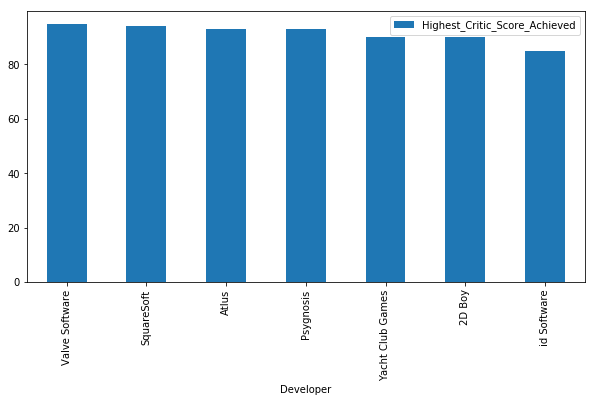

In [121]:
highDevCriticScoreDF = pd.DataFrame(highDevCriticScore, columns=['Developer', 'Highest_Critic_Score_Achieved', 'Game'])

highDevCriticScoreDF.sort_values('Highest_Critic_Score_Achieved', ascending=False)[:25].set_index('Developer').plot(kind='bar', figsize=(10,5))
plt.show()

In [125]:
# From our previous analysis, we determined SquareSoft, which later rebranded to Square Enix, is not
# an indie developer/publisher. By our definition, Valve can be determined to be an indie developer, however, 
# it is widely believed that Valve is in fact a big developer with a small amount of games released.

# By the graph, we see Atlus, Psygnosis and Yacht Club Games having the highest scores.

# Let's check the scores.

highDevCriticScoreDF.sort_values(by='Highest_Critic_Score_Achieved', ascending=False).set_index('Developer')

,Highest_Critic_Score_Achieved,Game
Developer,,
Valve Software,95.0,"808 Portal 2\nName: Name, dtype: object"
SquareSoft,94.0,"175 Final Fantasy IX\nName: Name, dtype: ob..."
Atlus,93.0,"1831 Persona 4: Golden\nName: Name, dtype: ..."
Psygnosis,93.0,"6632 WipEout XL\nName: Name, dtype: object"
Yacht Club Games,90.0,"9144 Shovel Knight\nName: Name, dtype: object"
2D Boy,90.0,"14098 World of Goo\nName: Name, dtype: object"
id Software,85.0,"14612 Doom\nName: Name, dtype: object"


In [106]:
# We determine that the developers Atlus and Psygnosis received the highest MetaCritic staff rating of 93.0 on their 
# games Persona 4 and WipEout XL, respectively, with Yacht Club Games and 2D Boy following close behind with a score of 
# 90.0 on the games Shovel Knight and World of Good, respectively.

In [114]:
# We define a function to create a list of those developers in the indie developer list, who also appear in the top 100
# lists created above, and their corresponding highest MetaCritic user score.

highDevUserScore = []

def getHighDevUserScoreList(data):
    for x in data:
        if x in userScoreTop100:
            sales1 = selfPublished[selfPublished['Developer'] == x]
            list1 = [x, float(sales1[sales1['User_Count'] > 0.1].sort_values(by=['User_Score'], ascending=False)[:1]['User_Score'])*10,
                    str(sales1[sales1['User_Count'] > 0.1].sort_values(by=['User_Score'], ascending=False)[:1]['Name'])]
            list.append(highDevUserScore, list1)
            
getHighDevUserScoreList(indieDevList)

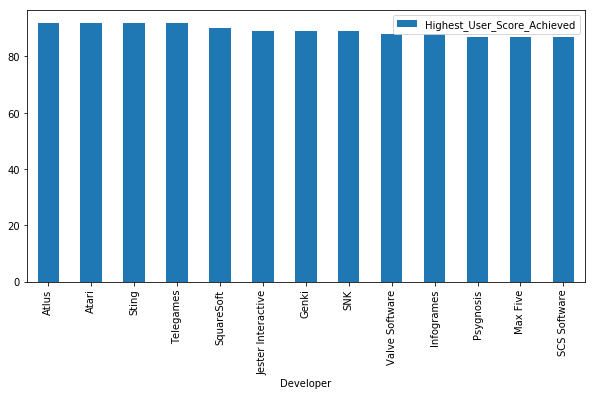

In [124]:
highDevUserScoreDF = pd.DataFrame(highDevUserScore, columns=['Developer', 'Highest_User_Score_Achieved', 'Name'])

highDevUserScoreDF.sort_values('Highest_User_Score_Achieved', ascending=False)[:25].set_index('Developer').plot(kind='bar', figsize=(10,5))
plt.show()

In [123]:
# We see Atlus, Atari, Sting Yacht Club Games and Telegames all showing scores that are very close.

# Let's check to see how they stack up with each other.

highDevUserScoreDF.sort_values(by='Highest_User_Score_Achieved', ascending=False).set_index('Developer')

,Highest_User_Score_Achieved,Name
Developer,,
Atlus,92.0,"1831 Persona 4: Golden\nName: Name, dtype: ..."
Atari,92.0,"11413 Grand Prix Challenge\nName: Name, dty..."
Sting,92.0,10491 Riviera: The Promised Land\nName: Nam...
Telegames,92.0,"4639 Solitaire Overload\nName: Name, dtype:..."
SquareSoft,90.0,"3481 Parasite Eve II\nName: Name, dtype: ob..."
Jester Interactive,89.0,14130 FunkMaster Flex's Digital Hitz Factor...
Genki,89.0,"2274 Tokyo Xtreme Racer 3\nName: Name, dtyp..."
SNK,89.0,"10079 The King of Fighters '99\nName: Name,..."
Valve Software,88.0,"2703 Portal 2\nName: Name, dtype: object"


In [35]:
# We determine that Atlus, Atari, Sting, and Telegames all received a MetaCritic 
# user score of 92.0 for the games Persona 4, Grand Prix: Challenge, Riviera: The Promised Land, 
# and Solitaire Overload, respectively.

In [129]:
# We define a function to create a list of those developers in the indie developer list, who also appear in the top 100
# lists created above, and the corresponding average of their highest MetaCritic staff and user score.

highDevAggrScore = []

def getHighDevAggrScoreList(data):
    for x in data:
        if x in criticScoreTop100:
            sales1 = selfPublished[selfPublished['Developer'] == x]
            list1 = [x, (float(sales1[sales1['User_Count'] > 0.1].sort_values(by=['User_Score'], ascending=False)[:1]['User_Score'])*10+
                         float(sales1[sales1['Critic_Score'] > 0.1].sort_values(by=['Critic_Score'], ascending=False)[:1]['Critic_Score']))/2,
                    str(sales1[sales1['User_Count'] > 0.1].sort_values(by=['User_Score'], ascending=False)[:1]['Name'])]
            list.append(highDevAggrScore, list1)

getHighDevAggrScoreList(indieDevList)

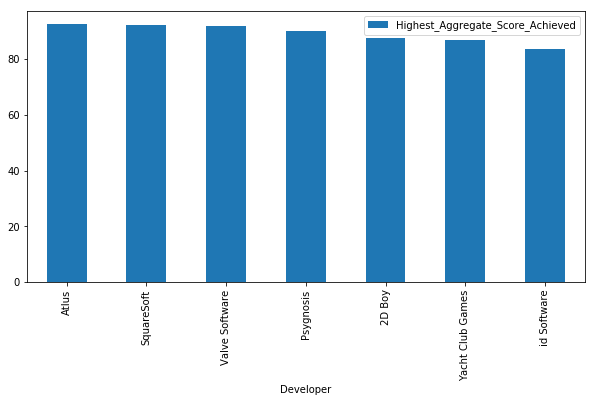

In [130]:
highDevAggrScoreDF = pd.DataFrame(highDevAggrScore, columns=['Developer', 'Highest_Aggregate_Score_Achieved', 'Name'])
highDevAggrScoreDF.sort_values('Highest_Aggregate_Score_Achieved', ascending=False)[:25].set_index('Developer').plot(kind='bar', figsize=(10,5))
plt.show()

In [132]:
# Again, ignoring SquareSoft and Valve Software, Atlus, Psygnosis and 2D Boy are showing 
# the highest aggregate score achieved.

In [126]:
highDevAggrScoreDF.sort_values(by='Highest_Aggregate_Score_Achieved', ascending=False).set_index('Developer')

,Highest_Aggregate_Score_Achieved,Name
Developer,,
Atlus,92.5,"1831 Persona 4: Golden\nName: Name, dtype: ..."
SquareSoft,92.0,"3481 Parasite Eve II\nName: Name, dtype: ob..."
Valve Software,91.5,"2703 Portal 2\nName: Name, dtype: object"
Psygnosis,90.0,"6632 WipEout XL\nName: Name, dtype: object"
2D Boy,87.5,"14098 World of Goo\nName: Name, dtype: object"
Yacht Club Games,86.5,"10778 Shovel Knight\nName: Name, dtype: object"
id Software,83.5,"14612 Doom\nName: Name, dtype: object"


In [133]:
# When combining the two metrics, we see that Atlus has the highest average score with 92.5 for Persona 4.
 
# Psygnosis and 2D Boy can be considered to be the next best developers in terms of the highest average
# rating they've received on a game with WipEout XL at 90.0 and World of Good at 87.5, respectively.